In [19]:
# Derin Sinir Ağları
# Yunus Emre AK

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Özel veri kümeleri oluşturmak için
from sklearn import datasets

In [21]:
# Nokta sayısı
n = 500

# İncelenecek veri kümesini oluşturma (mavi = 0, turuncu = 1)
x, y = datasets.make_circles(n_samples = n, random_state = 123, noise = 0.1, factor=0.2)

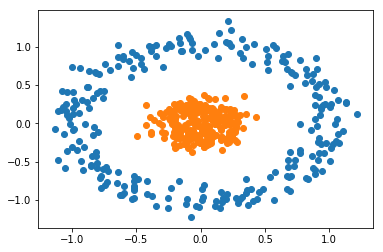

In [22]:
# Noktaları çizdirme
# önce maviler (0), sonra turuncular (1) çizilir
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])

In [35]:
# Sinir ağı modelini oluşturma
model = Sequential()

# Sinir ağının tipini ve nöronlarını oluşturma
# Dense: Layer (katman) X(input_shape=2)-4-1 (çıktı)
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Optimize etme ve değişim tipini ayarlama
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [24]:
# Modele verileri ekleme
# verbose: Ekrana çıktıları yazar
# batch_size: Her devre için gereken adım (GPU ile alakalı)
# epochs: Devre sayısı
h = model.fit(x=x, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 686us/step - loss: 0.7695 - acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 51us/step - loss: 0.6985 - acc: 0.5000
Epoch 3/100
500/500 [==============================] - 0s 60us/step - loss: 0.6916 - acc: 0.4780
Epoch 4/100
500/500 [==============================] - 0s 73us/step - loss: 0.6918 - acc: 0.6000
Epoch 5/100
500/500 [==============================] - 0s 68us/step - loss: 0.6908 - acc: 0.6680
Epoch 6/100
500/500 [==============================] - 0s 73us/step - loss: 0.6904 - acc: 0.4040
Epoch 7/100
500/500 [==============================] - 0s 88us/step - loss: 0.6894 - acc: 0.4540
Epoch 8/100
500/500 [==============================] - 0s 74us/step - loss: 0.6883 - acc: 0.4700
Epoch 9/100
500/500 [==============================] - 0s 75us/step - loss: 0.6853 - acc: 0.6700
Epoch 10/100
500/500 [==============================] - 0s 85us/step - loss: 0.6821 - acc: 0.6580
Epoch 11/100
500/500 [======

Text(0.5, 1.0, 'accuracy')

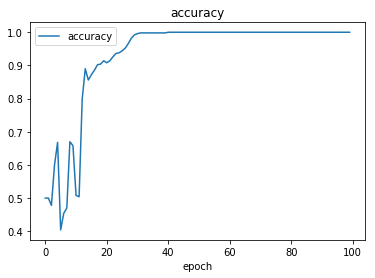

In [25]:
# Öğrenme grafiğini çizdirme
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

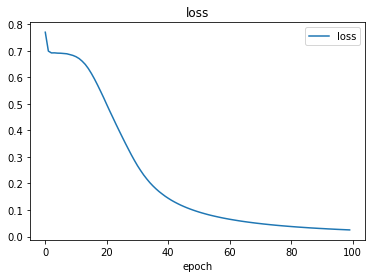

In [26]:
# Öğrenme grafiğini çizdirme
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [27]:
def plat_decision_boundary(x, y, model):
    # x,y dağılımlarını bulma (0.5 br daha uzun olacak çizgi)
    x_span = np.linspace(min(x[:, 0]) - 0.25, max(x[:, 0]) + 0.25)
    y_span = np.linspace(min(x[:, 1]) - 0.25, max(x[:, 1]) + 0.25)
    
    # Her x'e karşılık bir y değerinin geldiği matriksi oluşturma
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    tablo = np.c_[xx_, yy_]
    
    # Binary Data olduğu için predict
    ongoru_metodu = model.predict(tablo)
    z = ongoru_metodu.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    

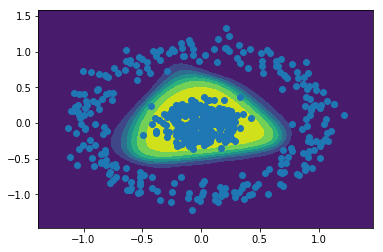

In [29]:
# Modeli ekrana çizdirme
plat_decision_boundary(x, y, model)
plt.scatter(x[:n, 0], x[:n, 1])
plt.scatter(x[n:, 0], x[n:, 1])

Öngörüm:  [[0.9808328]]


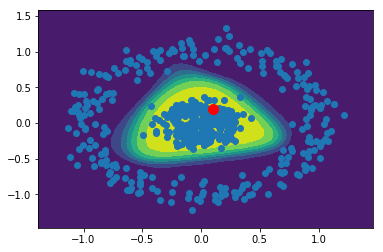

In [34]:
# Modeli ekrana çizdirme
plat_decision_boundary(x, y, model)
plt.scatter(x[:n, 0], x[:n, 1])
plt.scatter(x[n:, 0], x[n:, 1])

# Yeni bir nokta oluşturma ve test etme
x1 = 0.1
x2 = 0.2
nokta = np.array([[x1, x2]])

# Model'in öngürüsü
ongoru = model.predict(nokta)

# Noktayı ekrana belirgin olarak çizme
plt.plot([x1], [x2], marker='o', markersize=10, color="red")

# Öngörüyü yazdırma
print("Öngörüm: ", ongoru)